In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
# Load dataset
df = pd.read_csv("movies.csv")

# View first 5 rows
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# Number of rows and columns
df.shape



(4803, 24)

In [5]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [6]:
# Check missing values count
df.isnull().sum()


index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [7]:
# Fill missing values in text columns
df['genres'] = df['genres'].fillna("")
df['overview'] = df['overview'].fillna("")

# Recheck missing values
df.isnull().sum()


index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [8]:
# Check duplicate titles
df.duplicated(subset='title').sum()


3

In [9]:
# Remove duplicates if any
df = df.drop_duplicates(subset='title')


In [10]:
df.describe(include='all')


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
count,4800.000000,4.800000e+03,4800,1711,4800.000000,4388,4800,4800,4800,4800.000000,4800,4800,4799,4.800000e+03,4798.000000,4800,4800,3956,4800,4800.000000,4800.000000,4757,4800,4770
unique,NaN,NaN,1167,1690,NaN,4216,37,4800,4798,NaN,3695,469,3278,NaN,NaN,544,3,3941,4800,NaN,NaN,4738,4773,2347
top,NaN,NaN,Drama,http://www.missionimpossible.com/,NaN,independent film,en,Avatar,,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Avatar,NaN,NaN,William Shatner Leonard Nimoy DeForest Kelley ...,[],Steven Spielberg
freq,NaN,NaN,369,4,NaN,55,4503,1,3,NaN,350,2976,10,NaN,NaN,3169,4792,3,1,NaN,NaN,6,28,27
mean,2400.242917,2.906061e+07,NaN,NaN,57198.137708,NaN,NaN,NaN,NaN,21.497780,NaN,NaN,NaN,8.229362e+07,106.874531,NaN,NaN,NaN,NaN,6.092083,690.491458,NaN,NaN,NaN
std,1386.680143,4.073017e+07,NaN,NaN,88712.646793,NaN,NaN,NaN,NaN,31.824607,NaN,NaN,NaN,1.628993e+08,22.618241,NaN,NaN,NaN,NaN,1.194950,1234.911557,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1199.750000,7.950000e+05,NaN,NaN,9019.750000,NaN,NaN,NaN,NaN,4.668490,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000,NaN,NaN,NaN
50%,2399.500000,1.500000e+07,NaN,NaN,14633.000000,NaN,NaN,NaN,NaN,12.924931,NaN,NaN,NaN,1.917498e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.500000,NaN,NaN,NaN
75%,3600.250000,4.000000e+07,NaN,NaN,58639.500000,NaN,NaN,NaN,NaN,28.350628,NaN,NaN,NaN,9.293886e+07,117.750000,NaN,NaN,NaN,NaN,6.800000,737.250000,NaN,NaN,NaN


In [11]:
# Combine genres and overview
df['content'] = df['genres'] + " " + df['overview']

df[['title', 'content']].head()


,title,content
0,Avatar,Action Adventure Fantasy Science Fiction In th...
1,Pirates of the Caribbean: At World's End,"Adventure Fantasy Action Captain Barbossa, lon..."
2,Spectre,Action Adventure Crime A cryptic message from ...
3,The Dark Knight Rises,Action Crime Drama Thriller Following the deat...
4,John Carter,Action Adventure Science Fiction John Carter i...


In [12]:
# Lowercase titles for matching
df['title_lower'] = df['title'].str.lower()

df[['title', 'title_lower']].head()


,title,title_lower
0,Avatar,avatar
1,Pirates of the Caribbean: At World's End,pirates of the caribbean: at world's end
2,Spectre,spectre
3,The Dark Knight Rises,the dark knight rises
4,John Carter,john carter


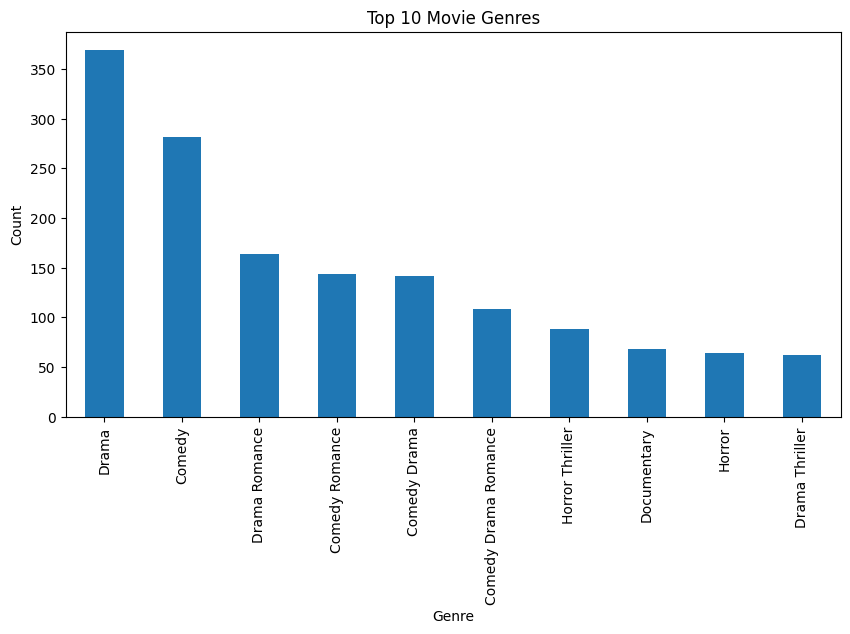

In [13]:
# Split genres and count
genre_series = df['genres'].str.split('|').explode()

plt.figure(figsize=(10,5))
genre_series.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


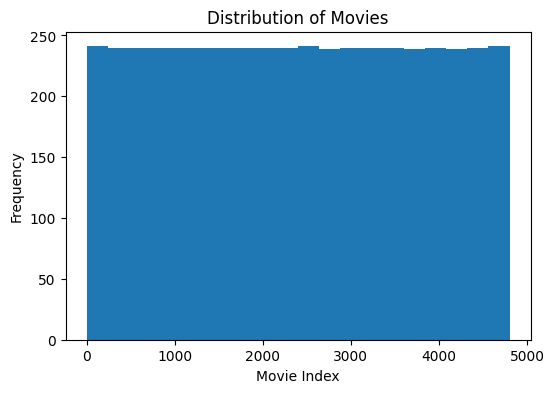

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df.index, bins=20)
plt.title("Distribution of Movies")
plt.xlabel("Movie Index")
plt.ylabel("Frequency")
plt.show()


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4800 non-null   int64  
 1   budget                4800 non-null   int64  
 2   genres                4800 non-null   object 
 3   homepage              1711 non-null   object 
 4   id                    4800 non-null   int64  
 5   keywords              4388 non-null   object 
 6   original_language     4800 non-null   object 
 7   original_title        4800 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4800 non-null   float64
 10  production_companies  4800 non-null   object 
 11  production_countries  4800 non-null   object 
 12  release_date          4799 non-null   object 
 13  revenue               4800 non-null   int64  
 14  runtime               4798 non-null   float64
 15  spoken_languages      4800

In [16]:
# Save the preprocessed dataset for reuse in the recommendation system
df.to_csv("movies_preprocessed.csv", index=False)
